# Prediction using Decision TreeAlgorithm


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
pip install matplotlib

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
pip install scipy

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
pip install seaborn

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
pip install textblob

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
pip install lightgbm

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
pip install os

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement os (from versions: )
No matching distribution found for os
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
pip install ps

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
stok_data=pd.read_csv("D:\\INTERNSHIP\\gstok market predction\\TSLA.csv")
stok_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500
5,2011-01-10,5.634,5.736,5.610,5.690,5.690,6713500
6,2011-01-11,5.718,5.742,5.384,5.392,5.392,8551000
7,2011-01-12,5.402,5.480,5.304,5.392,5.392,4822000
8,2011-01-13,5.392,5.394,5.232,5.244,5.244,3618000
9,2011-01-14,5.230,5.316,5.122,5.150,5.150,5960000


Text(0, 0.5, 'Close')

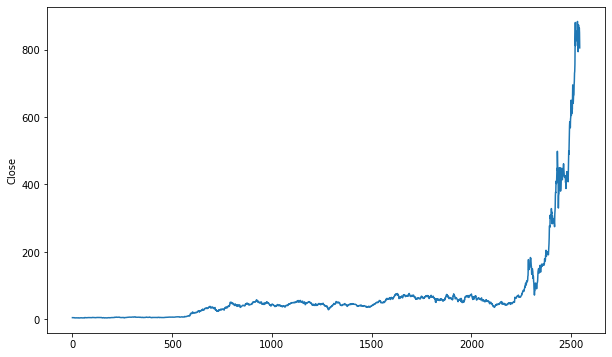

In [19]:
plt.figure(figsize=(10, 6))
stok_data['Close'].plot()
plt.ylabel('Close')

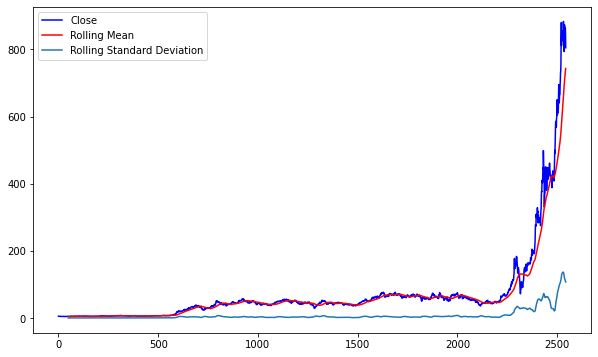

In [20]:
close = stok_data['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
stok_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

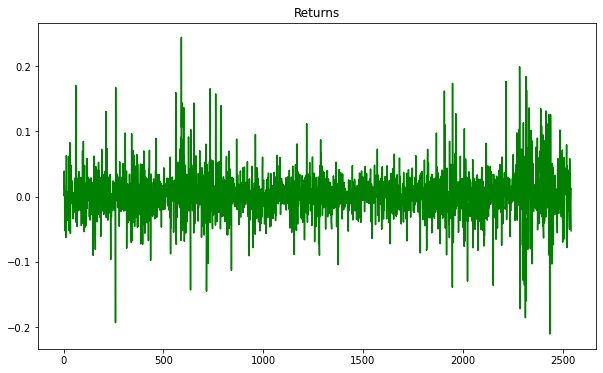

In [21]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [22]:
train = stok_data[:1000]
test = stok_data[1000:]

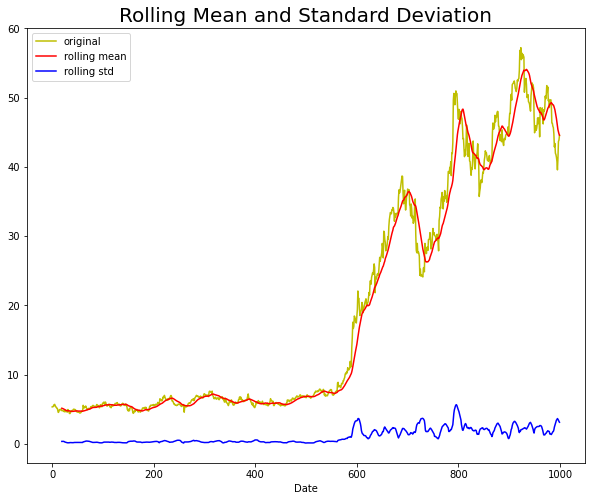

Results of dickey fuller test
ADF Test Statistic : -0.24797225224436198
p-value : 0.9325566177839144
#Lags Used : 0
Number of Observations Used : 999
Weak evidence against null hypothesis, time series is non-stationary 


In [23]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

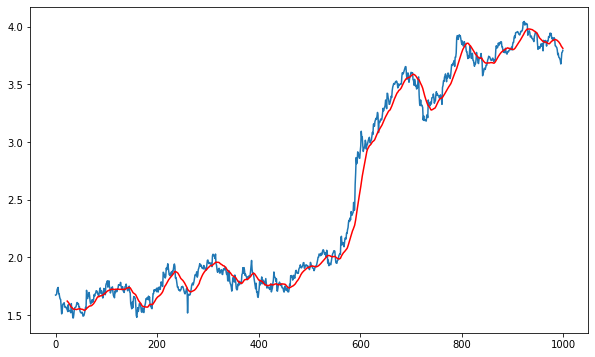

In [24]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

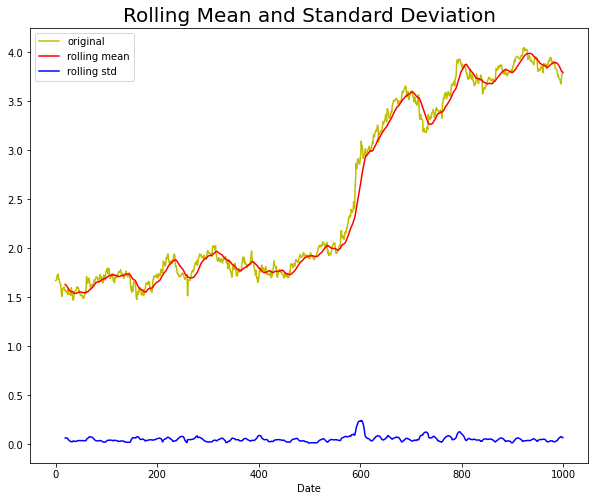

Results of dickey fuller test
ADF Test Statistic : -0.1789482464425438
p-value : 0.9409848511191731
#Lags Used : 0
Number of Observations Used : 999
Weak evidence against null hypothesis, time series is non-stationary 


In [25]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

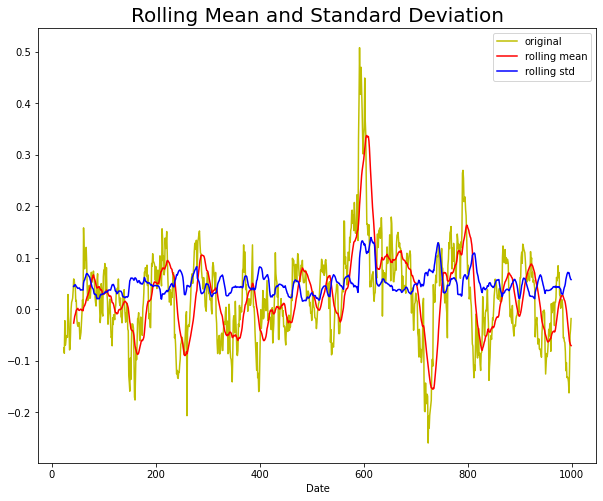

Results of dickey fuller test
ADF Test Statistic : -6.020828121614148
p-value : 1.4951920206040893e-07
#Lags Used : 0
Number of Observations Used : 976
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [26]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [27]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3865.328, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3870.318, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3869.067, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3869.137, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3868.598, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3868.619, Time=1.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.682 seconds


Text(0, 0.5, 'Actual Stock Price')

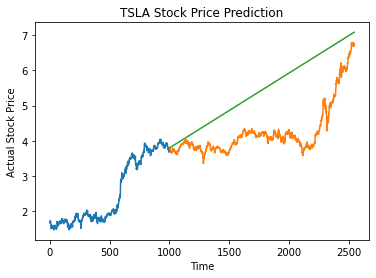

In [28]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [29]:
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  1.3508459548292038


In [30]:
cols=["Date","Category","News"]
news_data=pd.read_csv("D:\\INTERNSHIP\\gstok market predction\\News Data.csv",names=cols)
news_data.head()

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [31]:
news_data.drop(0, inplace=True)
news_data.drop("Category", axis=1,inplace=True)
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [32]:
news_data["Date"]=pd.to_datetime(news_data["Date"],format="%Y%m%d")
news_data.head()

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa


In [33]:
news_data["News"]=news_data.groupby(["Date"]).transform(lambda x:" ".join(x))
news_data=news_data.drop_duplicates()
news_data.reset_index(inplace=True, drop=True)
news_data

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [34]:
news_data["News"]

0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the dark Think...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7075    Containment zone residents slam high prices ch...
7076    like me i wont let you have a toxic relationsh...
7077    Atanu Ghosh plans to rewrite old scripts to ma...
7078    6 hot and stylish bikini looks of Katrina Kaif...
7079    Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
Name: News, Length: 7080, dtype: object

In [35]:
c = []
for i in range(0,len(news_data['News'])):
    news = re.sub('[^a-zA-Z]',' ',news_data['News'][i])
    news = news.lower()
    news = news.split()
    news=' '.join(news)
    c.append(news)

In [36]:
news_data['News'] = pd.Series(c)
news_data

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,status quo will not be disturbed at ayodhya sa...
2,2001-01-03,powerless north india gropes in the dark think...
3,2001-01-04,the string that pulled stephen hawking to indi...
4,2001-01-05,light combat craft takes india into club class...
...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,hot and stylish bikini looks of katrina kaif a...


In [37]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [38]:
news_data['Subjectivity'] = news_data['News'].apply(getSubjectivity)
news_data['Polarity'] = news_data['News'].apply(getPolarity)
news_data

,Date,News,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.286859,0.143590
2,2001-01-03,powerless north india gropes in the dark think...,0.392857,0.089286
3,2001-01-04,the string that pulled stephen hawking to indi...,0.445360,0.093039
4,2001-01-05,light combat craft takes india into club class...,0.480553,0.264024
...,...,...,...,...
7075,2020-06-26,containment zone residents slam high prices ch...,0.377957,0.060128
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.390221,0.080373
7077,2020-06-28,atanu ghosh plans to rewrite old scripts to ma...,0.397919,0.058824
7078,2020-06-29,hot and stylish bikini looks of katrina kaif a...,0.397084,0.065397


<AxesSubplot:>

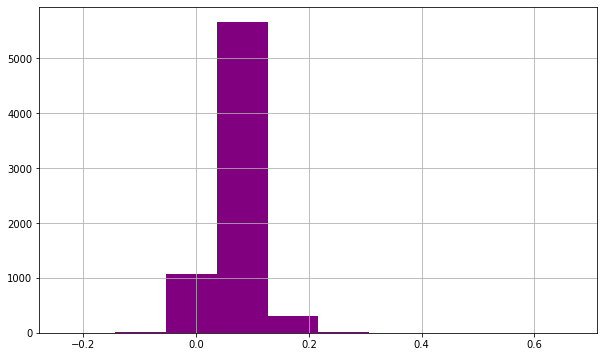

In [39]:
plt.figure(figsize = (10,6))
news_data['Polarity'].hist(color = 'purple')

<AxesSubplot:>

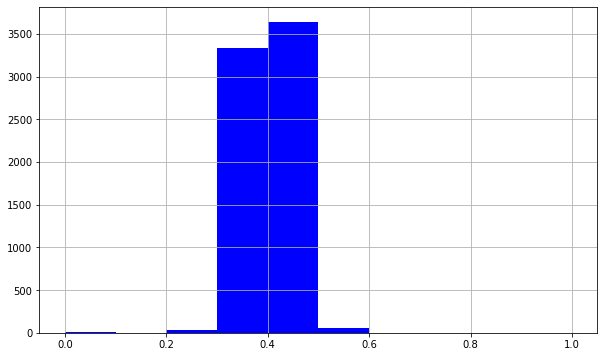

In [40]:
plt.figure(figsize = (10,6))
news_data['Subjectivity'].hist(color = 'blue')

In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

news_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_data['News']]
news_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_data['News']]
news_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_data['News']]
news_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_data['News']]
news_data

In [ ]:
merge_data = pd.merge(stok_data, news_data, how='inner', on='Date')
merge_data

In [ ]:
new_data = merge_data[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
new _data

In [ ]:
sc = MinMaxScaler()
data = pd.DataFrame(sc.fit_transform(new_data ))
data.columns = df.columns
data.index = df.index
data.head()

In [ ]:

X =data.drop('Close', axis=1)
y =data['Close']

In [ ]:
X.head()

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)


In [ ]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print(mean_squared_error(predictions, y_test))

In [ ]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

In [ ]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))